In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [2]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [3]:
boston

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


<AxesSubplot:ylabel='RM'>

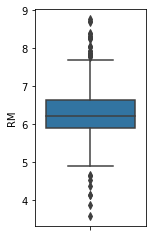

In [4]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston['RM'])

In [5]:
def find_boundaries(df, variable, distance = 1.5):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [6]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [7]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [8]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [9]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True, np.where(boston['RM'] < RM_lower_limit, True, False))

In [10]:
# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

In [11]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [12]:
# let's trimm the dataset only of outliers in RM

boston_trimmed = boston.loc[~outliers_RM] # ~False = True 

boston.shape, boston_trimmed.shape

((506, 3), (476, 3))

In [13]:
boston_trimmed

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


<AxesSubplot:ylabel='RM'>

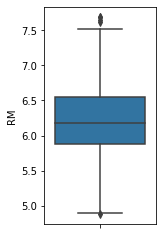

In [14]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston_trimmed['RM'])

In [15]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 3), (416, 3))

<AxesSubplot:ylabel='RM'>

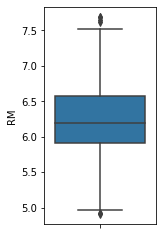

In [16]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston_trimmed['RM'])

## There is more section

In [28]:
def find_boundaries(df, variable, distance = 3):
    lower_boundary = df[variable].mean() - (df[variable].std() * 3)
    upper_boundary = df[variable].mean() + (df[variable].std() * 3)
    return upper_boundary, lower_boundary

In [29]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597757, 4.176782957105816)

In [30]:
def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [31]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston


In [33]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [34]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

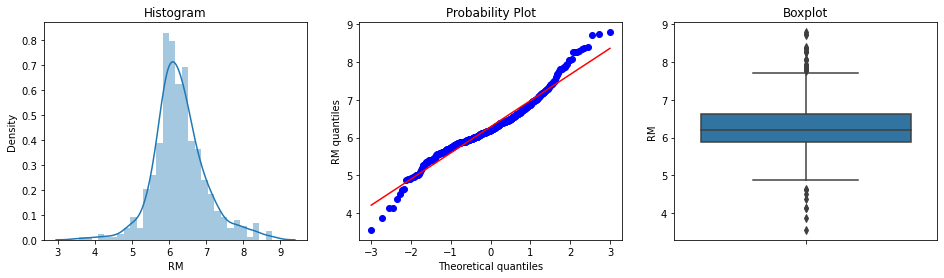

In [35]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

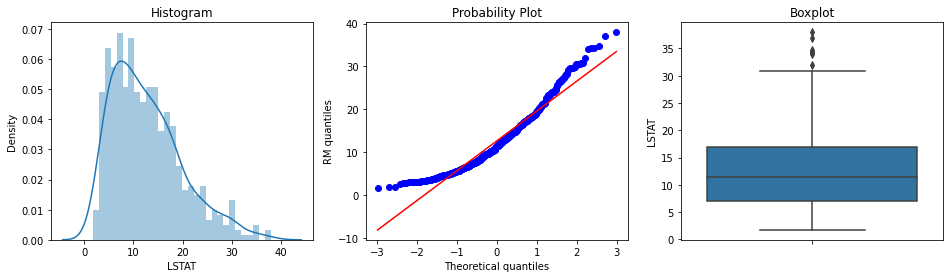

In [36]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

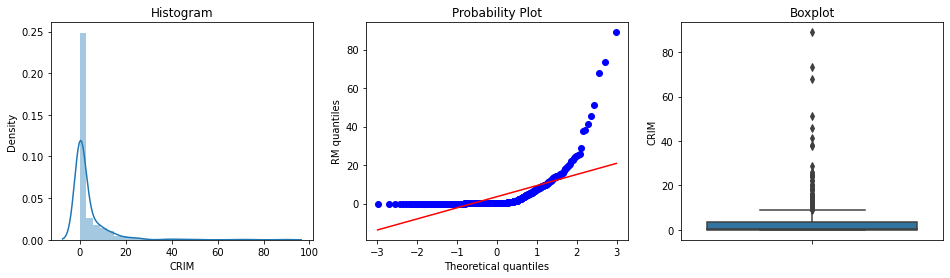

In [37]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

In [38]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [39]:
# Now let's replace the outliers by the percentiles

boston['RM']= winsorise(boston, 'RM', boston['RM'].quantile(0.95), boston['RM'].quantile(0.05))

In [40]:
boston['LSTAT']= winsorise(boston, 'LSTAT', boston['LSTAT'].quantile(0.95), boston['LSTAT'].quantile(0.05))

In [41]:
boston['CRIM']= winsorise(boston, 'CRIM', boston['CRIM'].quantile(0.95), boston['CRIM'].quantile(0.05))

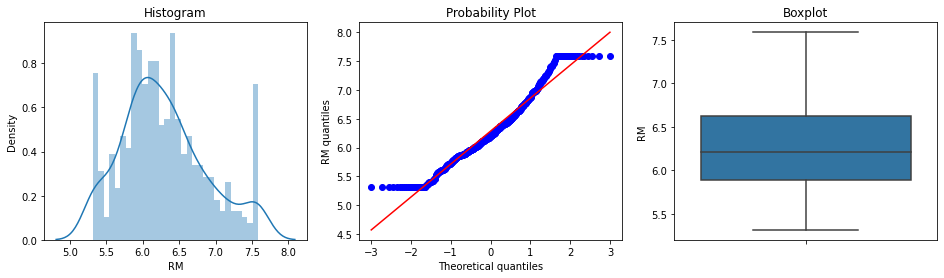

In [42]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

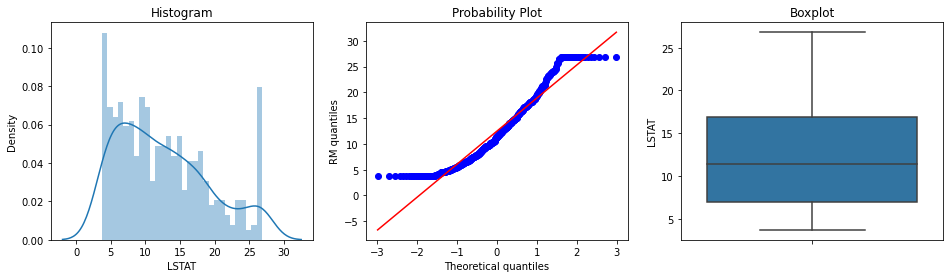

In [43]:
diagnostic_plots(boston, 'LSTAT')

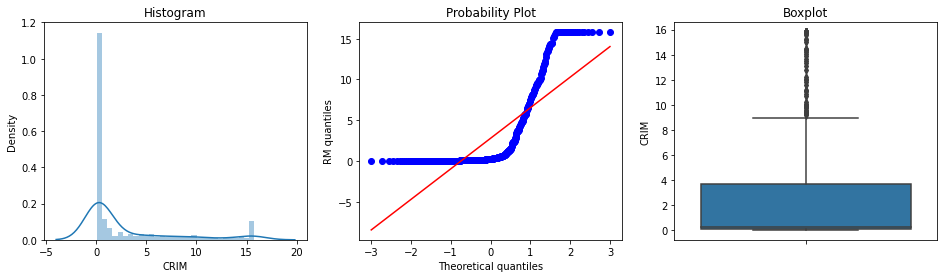

In [44]:
diagnostic_plots(boston, 'CRIM')

In [45]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [46]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [47]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [48]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597757, 4.176782957105816)

In [49]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.77012129293899)

In [50]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_normal_boundaries(boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.418158873309714, -22.19111175868521)

In [51]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [52]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [53]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))